<a href="https://colab.research.google.com/github/BrendenLatham/Data_Viz/blob/main/Exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 3

# Brenden Latham 245775

# CPSMA 4313

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/worldCupPlayer.csv')
df.head()

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,0,4.9,75.4,0.2,9,8.21,Morocco
1,2,2,Alireza Jahanbakhsh,AZ Alkmaar,24,33,2840,21,12,3,0,4.3,73.4,0.7,14,8.20,Iran
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90,Mexico
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,0,1.9,87.0,1.9,2,7.45,Denmark
4,10,25,Santiago Arias,PSV Eindhoven,26,30,2664,3,6,5,0,1.5,82.3,1,2,7.25,Colombia


## 1

### a

For my favorite nationality I will choose Mexico because that is where my fiance's family is frome

Flag_of_Mexico.svg

### b

In [24]:
mexico = df.loc[df['nationality']=='Mexico']
mexico = mexico.drop('nationality',1)
mexico

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90
231,446,83,Andres Guardado,Real Betis,31,25(4),2267,2,8,7,0,1.1,86.5,0.6,2,6.91
324,626,184,Carlos Salcedo,Eintracht Frankfurt,24,17(3),1608,0,0,5,0,0.3,80.3,2.4,0,6.68
396,765,2,Carlos Vela,Los Angeles FC,29,12,1080,7,2,1,0,3.9,83.4,0.3,4,7.82
398,768,137,Jonathan dos Santos,LA Galaxy,28,7(1),622,1,0,2,0,0.6,88.0,0.1,0,6.88
518,996,8,Hector Herrera,FC Porto,28,26(3),2335,3,4,7,0,1.3,84.7,2.2,1,7.50
519,997,90,Hector Herrera,FC Porto,28,6,531,1,1,1,0,1.2,82.9,1.8,0,7.09
524,1007,177,Raul Jimenez,Benfica,27,6(27),970,6,6,3,0,1.5,68.7,1.5,1,6.59
525,1009,357,Raul Jimenez,Benfica,27,3(2),308,0,0,0,0,1.8,67.3,2.8,0,6.44
579,1112,367,Diego Reyes,FC Porto,25,2(4),234,0,0,0,0,-,89.1,1,0,6.41


I think it is very interesting that two of the top five ranked players are from mexico

### c

Now I will create a histogram showing the frequency of the number of goals made by the players

[Text(0.5, 1.0, 'World Cup Player Goals')]

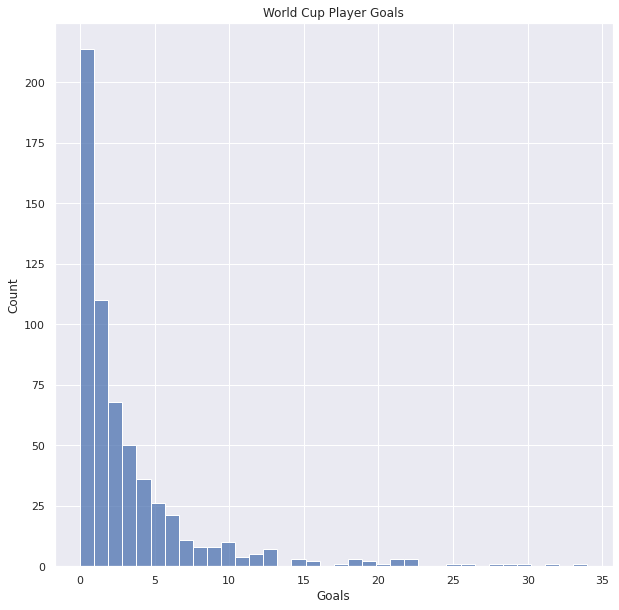

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.histplot(data = df['Goals'])
ax.set(title = 'World Cup Player Goals')

It looks like goals are pretty hard to come by

### d

Next I will be graphing assists to see how it stacks up against goals

[Text(0.5, 1.0, 'World Cup Player Goals and Assists')]

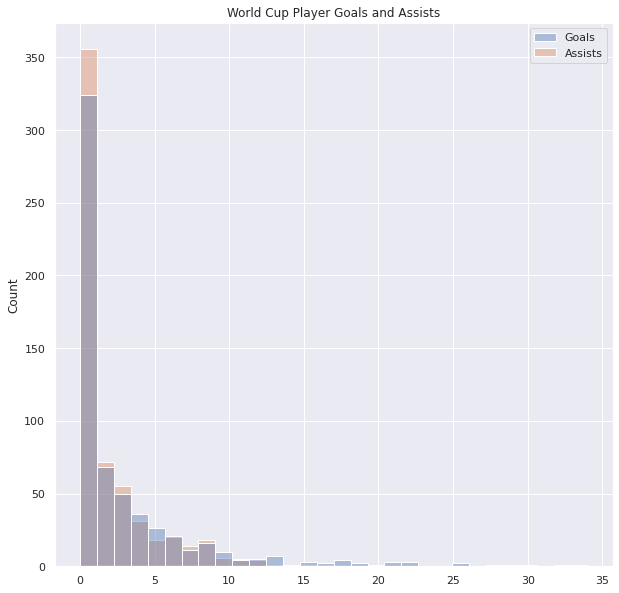

In [26]:
ax = sns.histplot(data = [df['Goals'],df['Assists']], alpha = 0.4, bins = 30)
ax.set(title = 'World Cup Player Goals and Assists')

It looks like the same is true for assists, however assists drop off faster at around 15

### e

Next I will look at max goals per nationality

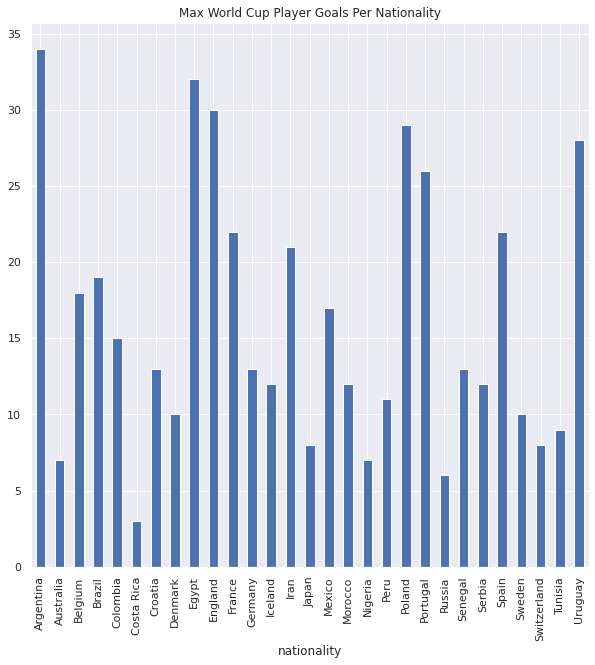

In [27]:
ax = df.groupby('nationality').Goals.agg('max').plot(kind = 'bar', title = 'Max World Cup Player Goals Per Nationality')

And here we can see that sadly mexico is far from having the player with the most goals. Argentina beats it by about 20 

### f

I will now have a look at yellow cards for each nationality using a boxplot

[Text(0.5, 1.0, 'World Cup Player Yellow Cards Per Nationality')]

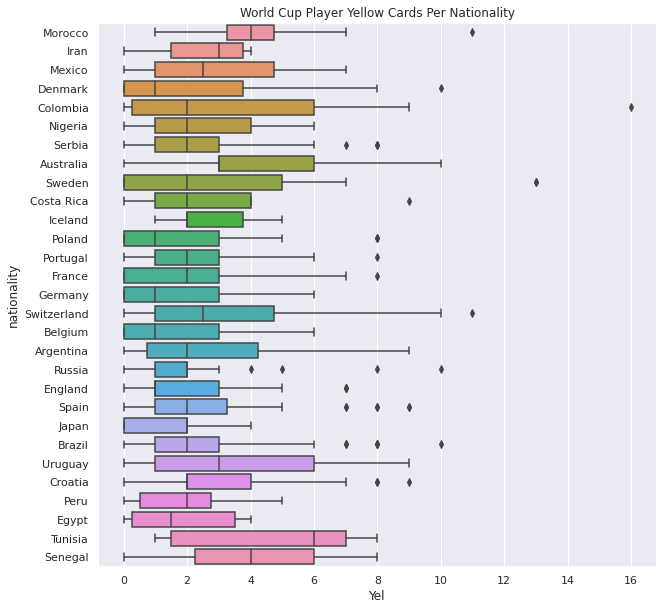

In [28]:
ax = sns.boxplot(x = df['Yel'], y = df['nationality'])
ax.set(title = 'World Cup Player Yellow Cards Per Nationality')

It seems like someone in Colombia needs to slow their roll. My guys in mexico seem pretty average and with no real outlier.

### g

Now I will look at goals and assists in a scatterplot. I will also highlight players from Mexico

In [29]:
df['IsMexico'] = [0]*len(df['nationality'])
for i in range(0,len(df['nationality']),1):
  if df['nationality'][i] == 'Mexico':
    df['IsMexico'][i] = 'Mexico'
  else:
    df['IsMexico'][i] = 'Other'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[Text(0.5, 1.0, 'Goals VS Assists For The World Cup Players')]

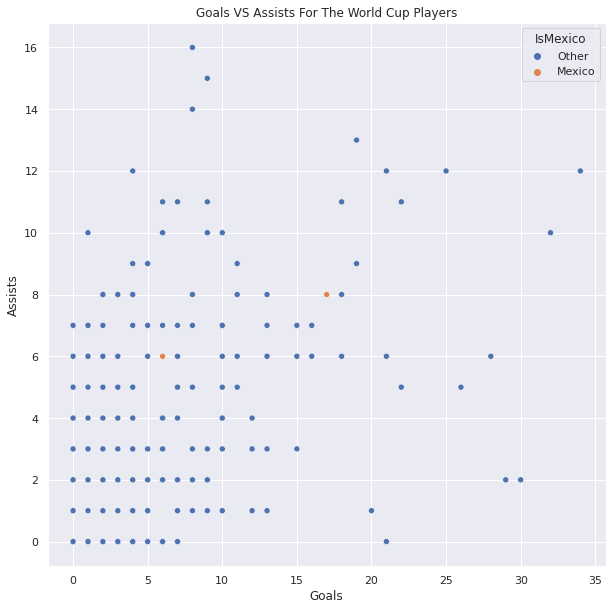

In [30]:
ax = sns.scatterplot(data = df, x = 'Goals', y = 'Assists', hue = 'IsMexico')
ax.set(title = 'Goals VS Assists For The World Cup Players')

It seems like what is happening here is that many points on this plot are laying on top of each other. If we look at the previous graphs we can see that most players had in the range of (0,10) goals and (0,10) assists. The value for each is a whole number by nature, so the weird plot we have here is very natural in this situation.

### h

Now I will create a stacked bar graph for goals and assists of the French National Team, the winners of the tournament.

There is no French National Team under the clubs tab and I have no idea how soccer works so I will just assume this means French players

In [31]:
french = df.loc[df['nationality']=='France']
french = french.drop('nationality',1)
french

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,IsMexico
30,59,5,Antoine Griezmann,Atletico Madrid,27,7(1),631,6,2,0,0,3.6,78.8,0.5,3,7.91,Other
31,60,13,Antoine Griezmann,Atletico Madrid,27,30(2),2530,19,9,7,1,2.3,77.6,0.8,8,7.38,Other
32,62,140,Antoine Griezmann,Atletico Madrid,27,6,529,2,2,1,0,3,84.1,0.5,1,6.98,Other
33,64,8,Nabil Fekir,Lyon,24,8,660,3,1,2,0,2.5,85.9,0.3,3,7.73,Other
34,65,3,Nabil Fekir,Lyon,24,28(2),2481,18,8,8,0,3,85.3,0.7,12,7.86,Other
68,131,93,Olivier Giroud,Arsenal,31,6,540,3,0,0,0,4.2,64.7,2.3,0,7.21,Other
91,177,156,Lucas Hernandez,Atletico Madrid,22,7(1),614,0,1,1,0,0.4,81.8,1.9,0,7.06,Other
92,179,17,Lucas Hernandez,Atletico Madrid,22,24(3),2117,0,1,6,1,0.3,82.9,1.6,1,7.24,Other
106,206,183,Florian Thauvin,Marseille,25,9(3),761,3,2,2,0,1.7,74.7,0.6,0,7.01,Other
107,208,2,Florian Thauvin,Marseille,25,35,2966,22,11,7,0,3.7,78.2,0.4,13,7.94,Other


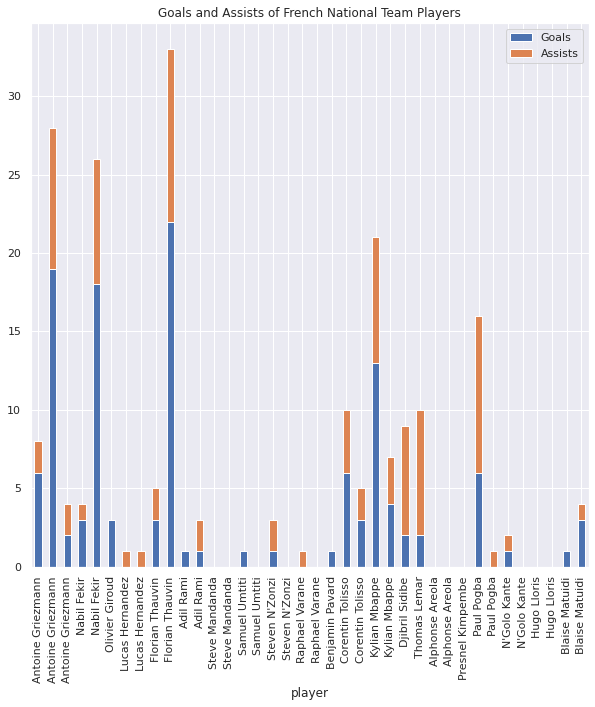

In [35]:
french[['player', 'Goals', 'Assists']].set_index('player').plot(kind = 'bar', stacked = True, title = 'Goals and Assists of French National Team Players')

It looks like Florian Thauvin had the biggest scoring contribution to the team. You might notice that players are listed multiple times. This has been a reocurring event if you look into past tables as well. I am not sure why the dataframe includes players multiple times with different stats each time, but like I said I don't know anything about how these soccer tournies work asside from what is explained in the assignment instructions. It is also worth noting that the bar graph is stacked because it gives a better representation of contribution made to the team.

### g

Finally I will give a correlation heatmap of the whole dataset

In [33]:
df = df.drop('IsMexico',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Correlation in the World Cup Players Data Set')]

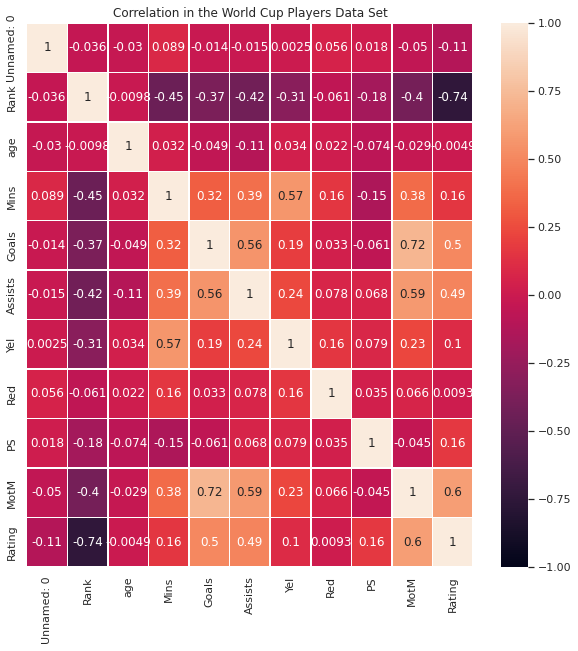

In [36]:
ax = sns.heatmap(df.corr(), annot = True, linewidths= 0.5, vmin = -1)
ax.set(title = 'Correlation in the World Cup Players Data Set')

It looks like there is some good correlation between Goals and whatever MotM is. There is also somewhat some correlation between yellow cards and minutes played. Rating and MotM has a higher correlation so MotM most likely has something to do with performance.

## 2

### a

2 hours

### b

The scatterplot was the hardest while everything else was pretty easy. The scatterplot was only hard because it took me a bit to figure out what was going on with the few amount of points.

### c

There aren't any visualizations on this assignment that I am aware that I don't understand. I think I understand this stuff pretty well, but I guess we will see.

## Sources

I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.

https://github.com/nurfnick/Data_Viz

https://github.com/BrendenLatham/Data_Viz

https://seaborn.pydata.org/generated/seaborn.scatterplot.html